# **Master of Data Science and Engineering (MCDE)**

* CNN

## **1. Convolutional Neural Network**
(consider the CNN shown in Figure 1, that will be used to classify
the images of the CIFAR10 dataset in the corresponding 10 classes. All convolutions have padding and bias should be considered.)

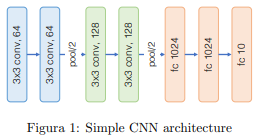

a) What is the input dimension of the final block (orange) and how many trainable parameters does this
model have? Justify your answers.

b) Implement this CNN, train it on the CIFAR10 dataset, and evaluate it using adequate metrics.

c) Propose an architecture based on the one shown in Figure 1 that can be used to handle the ImageNet dataset (consider the 1000-class subset used for ILSVRC). Explain the proposed adaptations to the
architecture. Note: you don not have to train and evaluate the model.

## a)  and  b)

### Data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

width, height = (x_train.shape[1], x_train.shape[2])

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


The dimensions of the image are 32X32
Check one image:


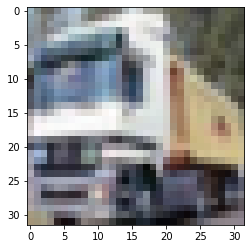

In [4]:
img = x_train[1]

h,  w ,c = img.shape
print(f"The dimensions of the image are {h}X{w}")
print('Check one image:')
plt.imshow(img)

### Visualize data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


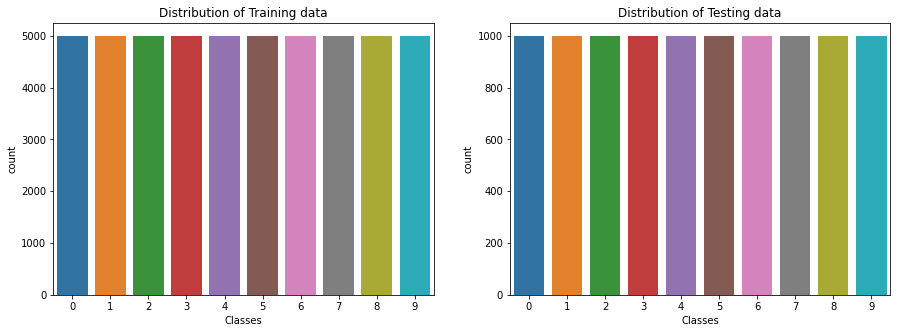

In [5]:
##Checking the number of classes in training and testing data

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training data')
axs[0].set_xlabel('Classes')


# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

### Images

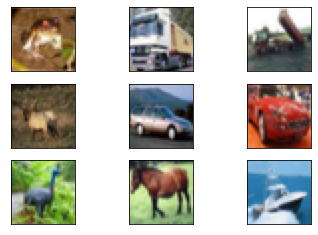

In [6]:
# Let's visualize the first 9 images from the trainset
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i].reshape(width, height, 3), cmap='gray')
    plt.xticks([]), plt.yticks([])

plt.show()

Reshape the Dataset

In [7]:
# Reshape dataset to have a single channel, converting from integers to floats, and normalizing they range to [0-1]
x_test_plot = x_test
y_test_plot = y_test

x_train = x_train.reshape(x_train.shape[0], width, height, 3).astype('float32') / 255 ## 3 means the number of channels
x_test = x_test.reshape(x_test.shape[0], width, height, 3).astype('float32') / 255

# Converting to one-hot encode for the target values
#10 is the number of classes = airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

### Define the model

In [8]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model = Sequential()

#First layer 2 blocks
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer = 'uniform', activation='relu',input_shape=(width, height, 3)))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer = 'uniform', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second layer 2 blocks
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer = 'uniform', padding='same')) #(kernel 3x3).
model.add(Conv2D(128, (3,3), activation = 'relu', kernel_initializer = 'uniform', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ## All convolutions have padding -- Same, and model containing just a single max pooling layer, Filter 2x2 and Stride 2,2

#Classification Layer
model.add(Flatten())
model.add(Dense(1024, activation='relu', use_bias='True')) # Bias should be considered
model.add(Dense(1024, activation='relu', use_bias='True')) # Bias should be considered
model.add(Dense(10, activation='softmax',use_bias='True')) # output layer 10 classes

# Define loss function and metric of excellence
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=METRICS)

### Summary

In [9]:
#Check CNN summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

### Answer a):


* 1. The input dimension for the final block (orange) is **(8X8X128)**, derived from max_pooling2d_9. After a flatten layer is applied, which converts the n-dimensional array to 1 dimensional array of **(None,8192)**, the Fully-Connected layer **(1024 neurons)** over a flattened image will be possible to classify the image not on the raw pixels, but on the learnt features of the image.
* 2. The model has **9.709.642** trainable parameters which is the sum of all  weights and biases defined on the layers.



### Train the model

In [10]:
#10 training epochs for now and a modest batch size of 64.
nEpochs = 10
batchSize = 32
num_classes = 10

history = model.fit(x_train, y_train, epochs=nEpochs, batch_size=batchSize, verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 29s 12ms/step - loss: 1.4888 - accuracy: 0.4528 - precision: 0.6957 - recall: 0.2522 - val_loss: 1.2305 - val_accuracy: 0.5557 - val_precision: 0.7073 - val_recall: 0.3972
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9845 - accuracy: 0.6487 - precision: 0.7775 - recall: 0.5276 - val_loss: 0.9771 - val_accuracy: 0.6599 - val_precision: 0.7635 - val_recall: 0.5638
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7662 - accuracy: 0.7277 - precision: 0.8178 - recall: 0.6404 - val_loss: 0.8764 - val_accuracy: 0.6971 - val_precision: 0.7821 - val_recall: 0.6205
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5913 - accuracy: 0.7925 - precision: 0.8550 - recall: 0.7332 - val_loss: 0.8496 - val_accuracy: 0.7181 - val_precision: 0.7892 - val_recall: 0.6603
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4365 - a

### Evaluation

In [11]:
# Evaluate the model in the test set
evaluate = model.evaluate(x_test, y_test)

print('Test loss:', evaluate[0])
print('Test accuracy:', evaluate[1])


313/313 [==============================] - 2s 5ms/step - loss: 1.6215 - accuracy: 0.7160 - precision: 0.7320 - recall: 0.7063
Test loss: 1.6215245723724365
Test accuracy: 0.7160000205039978


### Visualize Evaluation

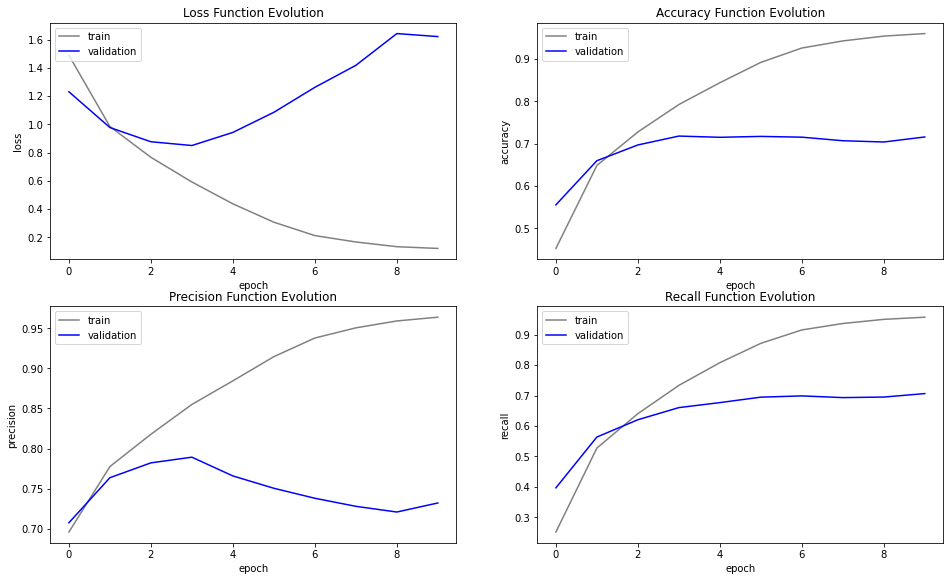

In [12]:
def plotTrainingHistory(history):
  plt.figure(figsize=(16, 20))

  plt.subplot(4, 2, 1)
  plt.plot(history.history['loss'], label='Loss', color='gray')
  plt.plot(history.history['val_loss'], label='val_Loss',color='blue')
  plt.title('Loss Function Evolution')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  
  plt.subplot(4, 2, 2)
  plt.plot(history.history['accuracy'], label='accuracy', color='gray')
  plt.plot(history.history['val_accuracy'], label='val_accuracy',color='blue')
  plt.title('Accuracy Function Evolution')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  
  plt.subplot(4, 2, 3)
  plt.plot(history.history['precision'], label='precision', color='gray')
  plt.plot(history.history['val_precision'], label='val_precision',color='blue')
  plt.title('Precision Function Evolution')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.ylabel('precision')
  plt.xlabel('epoch')

  plt.subplot(4, 2, 4)
  plt.plot(history.history['recall'], label='recall', color='gray')
  plt.plot(history.history['val_recall'], label='val_recall',color='blue')
  plt.title('Recall Function Evolution')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.ylabel('recall')
  plt.xlabel('epoch')
  

plotTrainingHistory(history)

### Visualize Erros

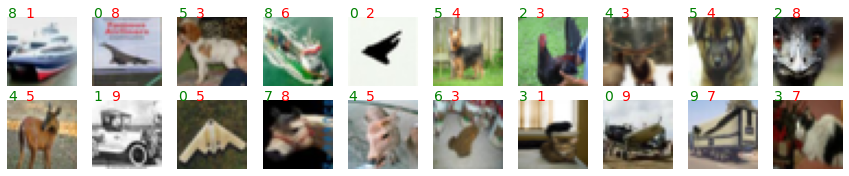

In [13]:
def showErrors(model, x_test, y_test, width, height):
    y_hat = np.argmax(model.predict(x_test), axis=-1)
    y_test_array = y_test.argmax(1)
    test_wrong = [im for im in zip(x_test,y_hat,y_test_array) if im[1] != im[2]]
    plt.figure(figsize=(15, 15))
    for ind, val in enumerate(test_wrong[:20]):
        plt.subplot(10, 10, ind + 1)
        plt.axis("off")
        plt.text(0, 0, val[2], fontsize=14, color='green') # correct
        plt.text(8, 0, val[1], fontsize=14, color='red')  # predicted
        plt.imshow(val[0].reshape(width, height, 3), cmap='gray')
    plt.show()

showErrors(model, x_test, y_test, width, height)

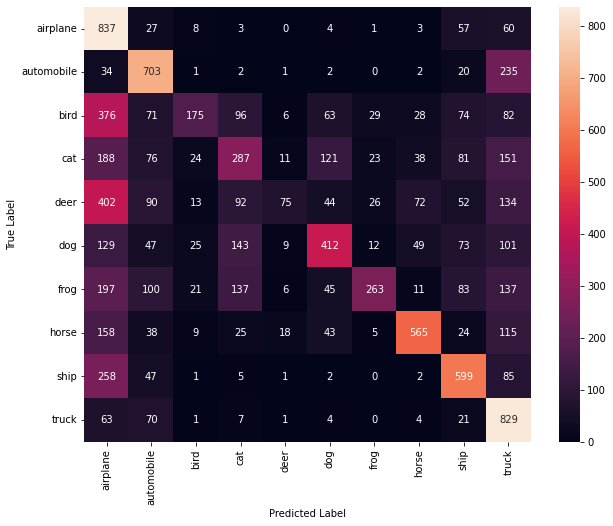

In [14]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#returns the probability of 10 labels for each of 10,000 test samples:
y_pred_lin = model.predict(x_test_plot) 

#picking the largest probability as the final predicted class:
y_pred_lin = np.argmax(y_pred_lin, axis=1)

#Visualizing model performance and classification report
cm_lin = confusion_matrix(y_test_plot, y_pred_lin)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_lin, annot=True, fmt='g', xticklabels=label_names, yticklabels=label_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

#disp = ConfusionMatrixDisplay(confusion_matrix=cm_lin,display_labels=label_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
#fig, ax = plt.subplots(figsize=(10, 10))
#disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
#plt.show()

In [15]:
#Classification report
print(classification_report(y_test_plot, y_pred_lin))

              precision    recall  f1-score   support

           0       0.32      0.84      0.46      1000
           1       0.55      0.70      0.62      1000
           2       0.63      0.17      0.27      1000
           3       0.36      0.29      0.32      1000
           4       0.59      0.07      0.13      1000
           5       0.56      0.41      0.47      1000
           6       0.73      0.26      0.39      1000
           7       0.73      0.56      0.64      1000
           8       0.55      0.60      0.57      1000
           9       0.43      0.83      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.54      0.47      0.44     10000
weighted avg       0.54      0.47      0.44     10000



### Answer b):

Regarding the performance evaluation, it is shown on a chart above the training and validation curves using loss, accuracy, precision, and recall.

On the chart of validation loss, after Epoch 3, the validation loss begins to rise while the training continues to decrease. In this case, the validation performance gets worse because the model is memorizing the training data but failing to generalize to new cases, which is a case of overfitting.

Lack of training data may cause overfitting, which leads to a model with poor generalization ability.

Applying dropout and data augmentation techniques is an option to deal with overfitting.




## c)

#### Answer c):

We would apply a similar CNN architecture compared to Figure 1, but considering that we need to distinguish 1000 classes in the Image-Net dataset, it will be required to change the number of nodes on the output layer to 1000.


Since we will have 1000 classes, it makes sense for a model to have 1000 nodes. When we have more than two classes, we need individual nodes for each class, because knowing the probability of one class doesn't let us infer the probability of the others. In this way, it should have one node for each output class.


Another recommendation could be three conv. blocks, all using padding and bias. Applying the activation function of relu' for all layers except for the last one, which would be softmax. The dense layer would have 2048 nodes.
The 1st conv block could have 25 filters and 5x5 kernel size.
The 2nd conv block could have 50 filters and 5x5 kernel size.
The 3rd conv block could have 70 filters and 3x3 kernel size.


Avoiding overfitting, data augmentation is a way to generate more training data from our current set. It enriches the training data by generating new examples via random transformations of existing ones. This way, we artificially boost the size of the training set, reducing overfitting. Also, to normalize the learning between the layer neurons, dropout would force every neuron to be able to operate independently. Because during training time, at each iteration, a neuron is temporarily "dropped" or disabled with probability p. This means all the inputs and outputs to this neuron will be disabled at the current iteration. The dropped-out neurons are resampled with probability p at every training step, so a dropped-out neuron at one step can be active at the next one.


Once we have complex images, we could apply fewer filters with bigger kernels in order to get more information and features from them. Then, increase the number of filters still using kernels 5x5. The last convolution would contain more filters with a smaller kernel, so we would get more details about the images and consequently increase the accuracy for this model over the epochs.